In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



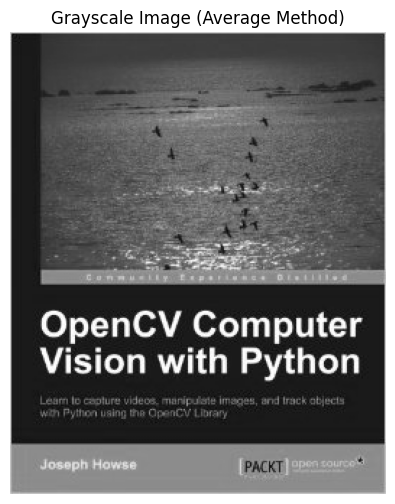

In [2]:
#trying my own gray scale (using avering b+r+g/3)
def convert_to_grayscale_average(image):
    
    grayscale_image = image.copy()

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):

            blue, green, red = image[x, y]
            # i originally added red + green + blue then divided by 3 which caused an overflow because data type of an image is unit 8 (max 255)
            #this bug distorted the image
            gray = (red/3 + green/3 + blue/3)

            
            #gray = (red * 0.2126 + green * 0.7152 + blue * 0.0722)       #whyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy does this work
            grayscale_image[x, y] = [gray, gray, gray]
    
    return grayscale_image


image = cv2.imread("data/test.jpg")
if image is None:
    print("plse dont crash if you didnt find any image")
else:
    #still catches me off gaurd that its not rgb and instead works as bgr
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    grayscale_image = convert_to_grayscale_average(image)

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(grayscale_image, cv2.COLOR_BGR2RGB))
    plt.title("Grayscale Image (Average Method)")
    plt.axis('off')
    plt.show()

    #save results
    cv2.imwrite("data/result.jpg", grayscale_image)
